In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Перед вами данные взаимодействий с рекламными объявлениями на некоторой площадке за 6 дней. И таблица с характеристиками рекламных клиентов (тех, кто разместил эти объявления).

In [60]:
ads_data = pd.read_csv('ads_data.csv', parse_dates=['date', 'time'])
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [61]:
ads_clients_data = pd.read_csv('ads_clients_data.csv', parse_dates=['date', 'create_date'])
ads_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).

In [23]:
clicks_and_views = ads_data \
    .groupby(['ad_id','event'], as_index=False) \
    .agg({'platform':'count'}) \
    .rename(columns={'platform':'count'}) \
    .pivot(index='ad_id',columns='event',values='count') \
    .fillna(0) 
clicks_and_views.head(10)

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0
2468,0.0,39.0
2494,1.0,324.0
2604,4.0,402.0
2709,14.0,2628.0


In [17]:
clicks_and_views.click.mean()

113.1378238341969

In [18]:
clicks_and_views.view.mean()

923.1316062176165

In [69]:
log_from_views_count = np.log(ads_data.query('event == "view"').ad_id.value_counts())

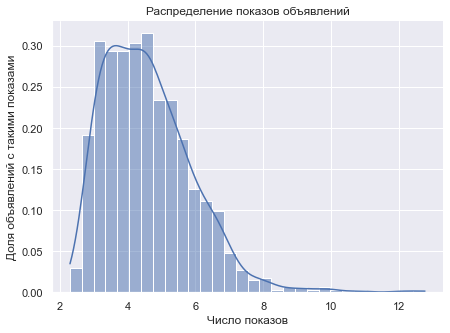

In [135]:
fig, ax = plt.subplots(figsize=(7,5))
sns.set(style='darkgrid')
sns.histplot(x=log_from_views_count, stat='density',ax=ax, kde=True)
ax.set_title('Распределение показов объявлений')
ax.set_xlabel('Число показов')
ax.set_ylabel('Доля объявлений с такими показами')
sns.despine()

Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.

Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.

In [120]:
mean_count_views_per_date = ads_data \
    .query('event == "view"') \
    .groupby(['date', 'ad_id']) \
    .agg({'event':'count'}) \
    .rename(columns={'event':'count'}) \
    .groupby('date') \
    .agg({'count':'mean'}) \
    .rename(columns={'count':'mean_count_views'}) 
mean_count_views_per_date

,mean_count_views
date,
2019-04-01,154.482270
2019-04-02,137.786982
2019-04-03,163.952778
2019-04-04,675.901720
2019-04-05,919.109677
2019-04-06,277.122727


In [119]:
mean_count_views_per_date.query('date == "2019-04-06"')

,date,mean_count_views,MA2
5,2019-04-06,277.122727,598.116202


In [121]:
ma2_count_views_per_date = mean_count_views_per_date \
                                        .mean_count_views \
                                        .rolling(2) \
                                        .mean()
ma2_count_views_per_date

date
2019-04-01           NaN
2019-04-02    146.134626
2019-04-03    150.869880
2019-04-04    419.927249
2019-04-05    797.505699
2019-04-06    598.116202
Name: mean_count_views, dtype: float64

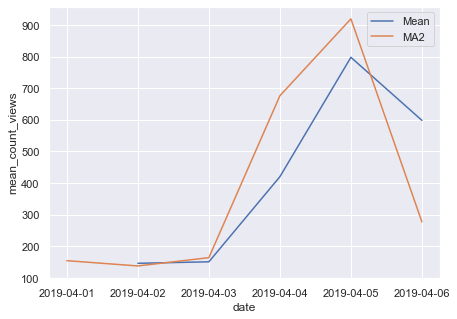

In [130]:
fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=ma2_count_views_per_date, label='Mean')
sns.lineplot(data=mean_count_views_per_date.mean_count_views, label='MA2')
plt.legend()

Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).

В качестве ответа укажите среднее число дней.

In [153]:
merged = ads_clients_data.merge(ads_data, on=['client_union_id'], suffixes=('_clients_data','_ad_data'))
merged.head()

,date_clients_data,client_union_id,community_id,create_date,date_ad_data,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035
1,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035
2,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035
3,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035
4,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035


In [217]:
date = merged \
    .groupby(['client_union_id','create_date'], as_index=False) \
    .agg({'date_ad_data':'min'}) 

,client_union_id,create_date,date_ad_data
0,1,2018-12-24,2019-04-01
1,9,2018-12-10,2019-04-03
2,13,2019-01-26,2019-04-02
3,16,2018-12-19,2019-04-03
4,20,2019-03-01,2019-04-02
...,...,...,...
833,122004,2019-01-24,2019-04-01
834,122013,2018-11-04,2019-04-04
835,122023,2018-11-29,2019-04-04
836,122031,2018-12-30,2019-04-05


In [221]:
merged['difference'] = date.date_ad_data - date.create_date

In [164]:
mean_days_difference = merged.difference.mean()

In [165]:
mean_days_difference

Timedelta('124 days 09:04:43.532219570')